In [1]:
import pandas as pd

df = pd.read_csv("../data/GlobalLandTemperaturesByCity.csv")
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [2]:
df['dt'] = pd.to_datetime(df['dt'])
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
df.isna().sum()


dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [4]:
df_clean = df.dropna(subset=['AverageTemperature'])
df_clean.shape


(8235082, 7)

In [5]:
df['dt'] = pd.to_datetime(df['dt'])
df_clean = df.dropna(subset=['AverageTemperature'])
df_clean.head()



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [6]:
global_yearly = (
    df_clean
    .groupby(df_clean['dt'].dt.year)['AverageTemperature']
    .mean()
    .reset_index()
)
global_yearly.head()


,dt,AverageTemperature
0,1743,4.882424
1,1744,10.734047
2,1745,1.497593
3,1750,9.872808
4,1751,10.046739


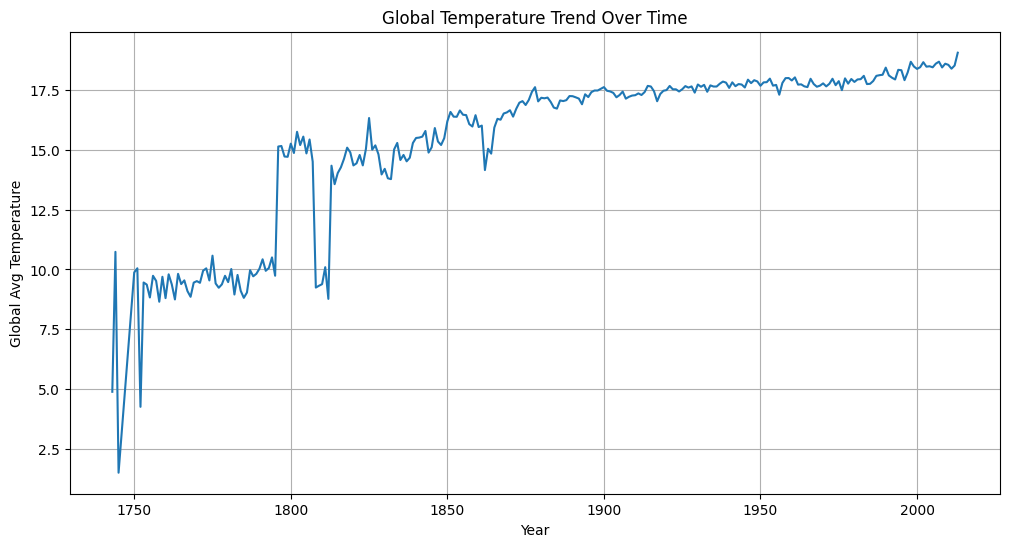

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(global_yearly['dt'], global_yearly['AverageTemperature'])
plt.xlabel("Year")
plt.ylabel("Global Avg Temperature")
plt.title("Global Temperature Trend Over Time")
plt.grid(True)
plt.show()


In [8]:
country = "India"

df_country = df_clean[df_clean['Country'] == country]

country_yearly = (
    df_country
    .groupby(df_country['dt'].dt.year)['AverageTemperature']
    .mean()
    .reset_index()
)
country_yearly.head()


,dt,AverageTemperature
0,1796,25.444699
1,1797,26.594590
2,1798,25.054708
3,1799,25.723100
4,1800,25.693772


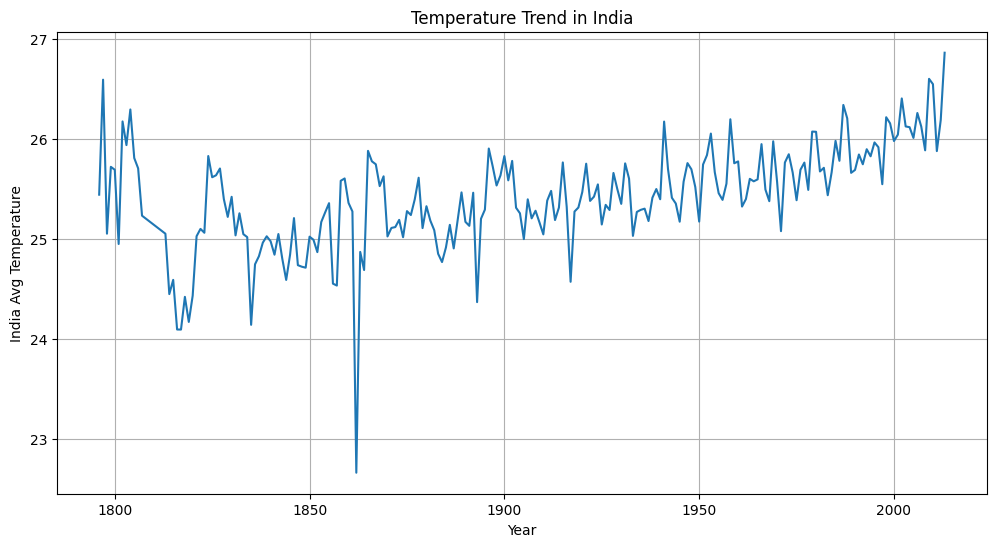

In [9]:
plt.figure(figsize=(12,6))
plt.plot(country_yearly['dt'], country_yearly['AverageTemperature'])
plt.xlabel("Year")
plt.ylabel(f"{country} Avg Temperature")
plt.title(f"Temperature Trend in {country}")
plt.grid(True)
plt.show()


In [10]:
df_clean['City'].unique()[:50]


array(['Århus', 'Çorlu', 'Çorum', 'Öskemen', 'Ürümqi', 'A Coruña',
       'Aachen', 'Aalborg', 'Aba', 'Abadan', 'Abakaliki', 'Abakan',
       'Abbotsford', 'Abengourou', 'Abeokuta', 'Aberdeen', 'Abha',
       'Abidjan', 'Abiko', 'Abilene', 'Abohar', 'Abomey Calavi',
       'Abu Dhabi', 'Abuja', 'Acapulco', 'Acarigua', 'Accra', 'Achalpur',
       'Acheng', 'Achinsk', 'Acuña', 'Adana', 'Addis Abeba', 'Adelaide',
       'Aden', 'Adilabad', 'Adiwerna', 'Adoni', 'Afyonkarahisar',
       'Agadir', 'Agartala', 'Agboville', 'Ageo', 'Agra',
       'Aguascalientes', 'Ahmadabad', 'Ahmadnagar', 'Ahmadpur East',
       'Ahvaz', 'Aix En Provence'], dtype=object)

In [11]:
city = "Delhi"

df_city = df_clean[df_clean['City'] == city]

city_yearly = (
    df_city
    .groupby(df_city['dt'].dt.year)['AverageTemperature']
    .mean()
    .reset_index()
)



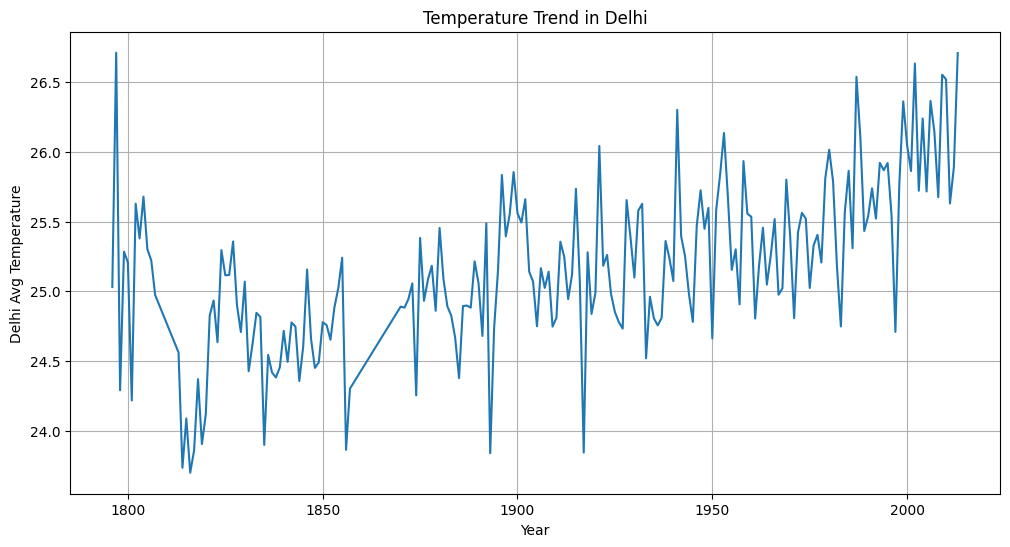

In [12]:
plt.figure(figsize=(12,6))
plt.plot(city_yearly['dt'], city_yearly['AverageTemperature'])
plt.xlabel("Year")
plt.ylabel(f"{city} Avg Temperature")
plt.title(f"Temperature Trend in {city}")
plt.grid(True)
plt.show()


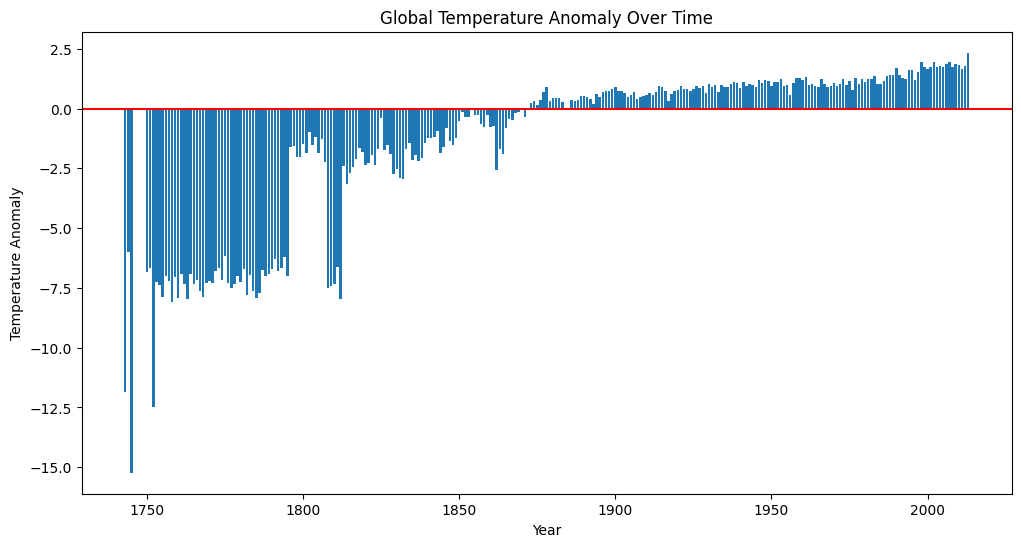

In [13]:
baseline = df_clean['AverageTemperature'].mean()

global_yearly['anomaly'] = global_yearly['AverageTemperature'] - baseline

plt.figure(figsize=(12,6))
plt.bar(global_yearly['dt'], global_yearly['anomaly'])
plt.axhline(0, color='red')
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly")
plt.title("Global Temperature Anomaly Over Time")
plt.show()
